In [1]:
import numpy                            as np
import pandas                           as pd
import matplotlib.pyplot                as plt
import statsmodels.tools.eval_measures  as em
import seaborn                          as sns


from statsmodels.tsa.seasonal           import seasonal_decompose, STL
from sklearn.metrics                    import mean_squared_error
from statsmodels.tsa.api                import ExponentialSmoothing, SimpleExpSmoothing, Holt
from IPython.display                    import display
from pylab                              import rcParams
from datetime                           import datetime,timedelta
from math                               import sqrt
from statsmodels.tsa.stattools          import adfuller, pacf, acf
from statsmodels.graphics.tsaplots      import plot_pacf, plot_acf
#from statsmodels.tsa.arima_model       import  ARMA
from statsmodels.tsa.arima.model        import ARIMA
from statsmodels.graphics.gofplots      import qqplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn                            import metrics
from timeit                             import default_timer as timer
from statsmodels.tsa.statespace.varmax  import VARMAX

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1. Reading Data
2. Plotting Time series
3. Handling Missing Data
4. Modifying Time series Range
5. Decomposition of time series
6. Moving Average
7. Splitting Time Series Data
8. Decomposition Model<br/>
    8.1 Simple Exponential<br/>
    8.2 Double Exponential<br/>
    8.3 Tripple Exponential<br/>
9. Regression Model<br/>
    9.1 ARIMA<br/>
    9.2 SARIMA<br/>
    9.3 SARIMAX<br/>
10. Validation<br/>
    10.1 MAE<br/>
    10.2 MAPE<br/>
    10.3 MSE<br/>
    10.4 RMSE<br/>

# 1. Reading Data

#### Example 1

In [2]:
df1 = pd.read_csv('AirPassenger.csv')

In [3]:
df1.dtypes

Year-Month    object
Pax            int64
dtype: object

In [4]:
df1

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121
...,...,...
139,1960-Aug,606
140,1960-Sep,508
141,1960-Oct,461
142,1960-Nov,390


In [5]:
df1.set_index('Year-Month', inplace=True)

In [6]:
df1

,Pax
Year-Month,
1949-Jan,112
1949-Feb,118
1949-Mar,132
1949-Apr,129
1949-May,121
...,...
1960-Aug,606
1960-Sep,508
1960-Oct,461


#### Example 2

In [7]:
df1 = pd.read_csv('AirPassenger.csv',parse_dates = ['Year-Month'])

In [8]:
df1

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
df1.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

#### Example 3

In [10]:
df1 = pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month'], index_col= 'Year-Month' )

In [11]:
df1

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [12]:
df1.dtypes

Pax    int64
dtype: object

In [13]:
df1.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
df1['1951-04-01':'1952-01-01']

,Pax
Year-Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [15]:
df1.loc['1960-05-01']

Pax    472
Name: 1960-05-01 00:00:00, dtype: int64

#### Ecample (Generating the Column)

In [16]:
df2 = pd.read_csv('Gas.csv')

In [17]:
df2

,Unnamed: 0,x
0,1,1709
1,2,1646
2,3,1794
3,4,1878
4,5,2173
...,...,...
471,472,49013
472,473,56624
473,474,61739
474,475,66600


In [18]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
df2.shape

(476, 1)

In [20]:
476/12   # will require 40 years

39.666666666666664

In [21]:
date = pd.date_range(start='1/1/1956',end='1/1/1996',freq='M', normalize=False)

In [22]:
date

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=480, freq='M')

In [23]:
date.size

480

In [24]:
df2['TimeStamp'] = pd.DataFrame(date)

In [25]:
df2

,x,TimeStamp
0,1709,1956-01-31
1,1646,1956-02-29
2,1794,1956-03-31
3,1878,1956-04-30
4,2173,1956-05-31
...,...,...
471,49013,1995-04-30
472,56624,1995-05-31
473,61739,1995-06-30
474,66600,1995-07-31


In [26]:
df2.set_index('TimeStamp', inplace=True)

In [27]:
df2.head()

,x
TimeStamp,
1956-01-31,1709
1956-02-29,1646
1956-03-31,1794
1956-04-30,1878
1956-05-31,2173


#### Example (Time data in multiple column)

In [28]:
df3= pd.read_csv('RetailTurnover.csv')

In [29]:
df3.head()

,Year,Quarter,Turnover
0,1982,Q3,13423.2
1,1982,Q4,13128.8
2,1983,Q1,15398.8
3,1983,Q2,12964.2
4,1983,Q3,13133.5


In [30]:
quarters = pd.date_range(start='9/30/1982', end='3/31/1992', freq='Q')
quarters

DatetimeIndex(['1982-09-30', '1982-12-31', '1983-03-31', '1983-06-30',
               '1983-09-30', '1983-12-31', '1984-03-31', '1984-06-30',
               '1984-09-30', '1984-12-31', '1985-03-31', '1985-06-30',
               '1985-09-30', '1985-12-31', '1986-03-31', '1986-06-30',
               '1986-09-30', '1986-12-31', '1987-03-31', '1987-06-30',
               '1987-09-30', '1987-12-31', '1988-03-31', '1988-06-30',
               '1988-09-30', '1988-12-31', '1989-03-31', '1989-06-30',
               '1989-09-30', '1989-12-31', '1990-03-31', '1990-06-30',
               '1990-09-30', '1990-12-31', '1991-03-31', '1991-06-30',
               '1991-09-30', '1991-12-31', '1992-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [31]:
df3['TimeStamp'] = quarters
df3.drop(['Year','Quarter'],axis=1,inplace=True)
df3.set_index('TimeStamp',inplace=True)
df3.head()

,Turnover
TimeStamp,
1982-09-30,13423.2
1982-12-31,13128.8
1983-03-31,15398.8
1983-06-30,12964.2
1983-09-30,13133.5


#### Example ( Multivariate Time Series )

In [32]:
df4= pd.read_csv('Daily_electricity_consumption.csv')
date = pd.date_range(start='1/1/2009', end='11/26/2010', freq='D')
df4['TimeStamp'] = date
df4.set_index('TimeStamp', inplace=True)
df4.drop('date_time',axis=1, inplace=True)
df4.head()

,active_power_consumed,meter_reading
TimeStamp,,
2009-01-01,0.976869,1.946528
2009-01-02,1.616326,8.222917
2009-01-03,1.328817,7.249306
2009-01-04,1.347218,2.253472
2009-01-05,1.113889,6.006944


# 2. Plotting

<Axes: xlabel='Year-Month'>

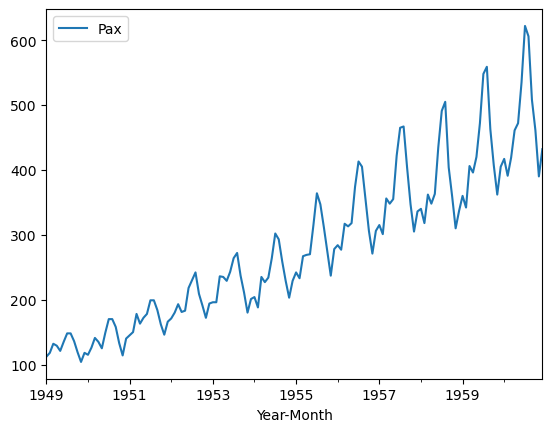

In [33]:
df1.plot()

<Axes: xlabel='Year-Month'>

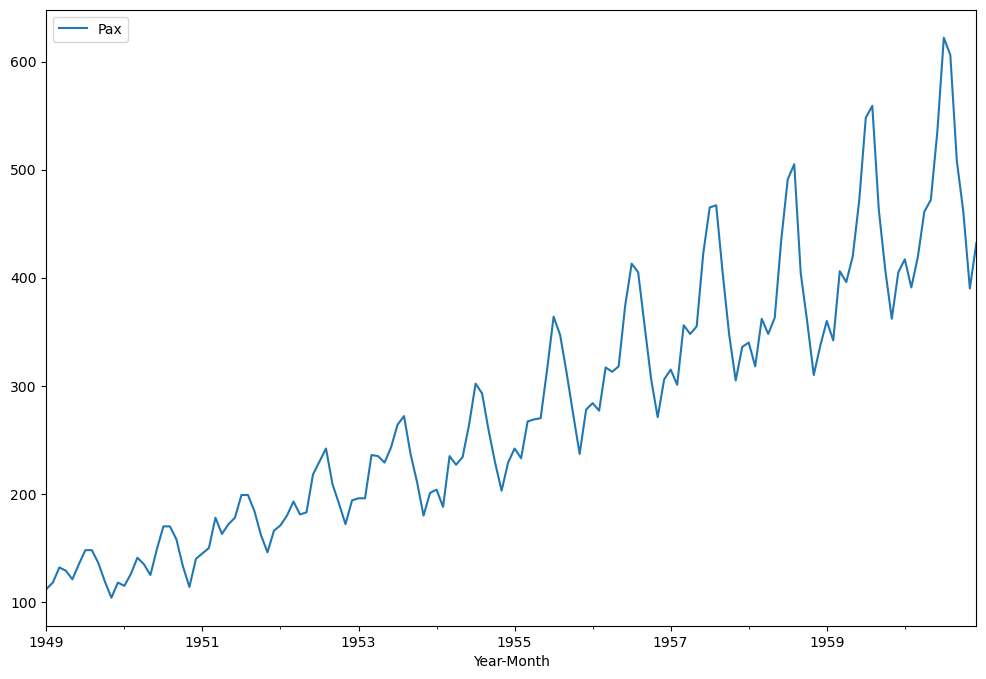

In [34]:
df1.plot(figsize=(12,8))

<Axes: xlabel='Year-Month'>

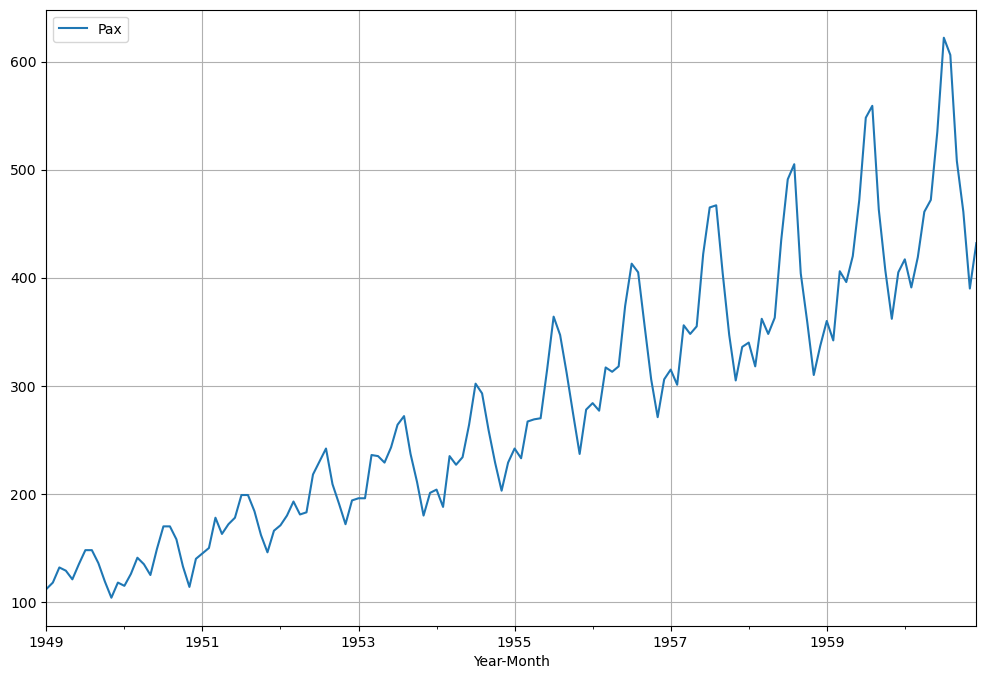

In [35]:
df1.plot(figsize=(12,8),grid=True)

<Axes: xlabel='TimeStamp'>

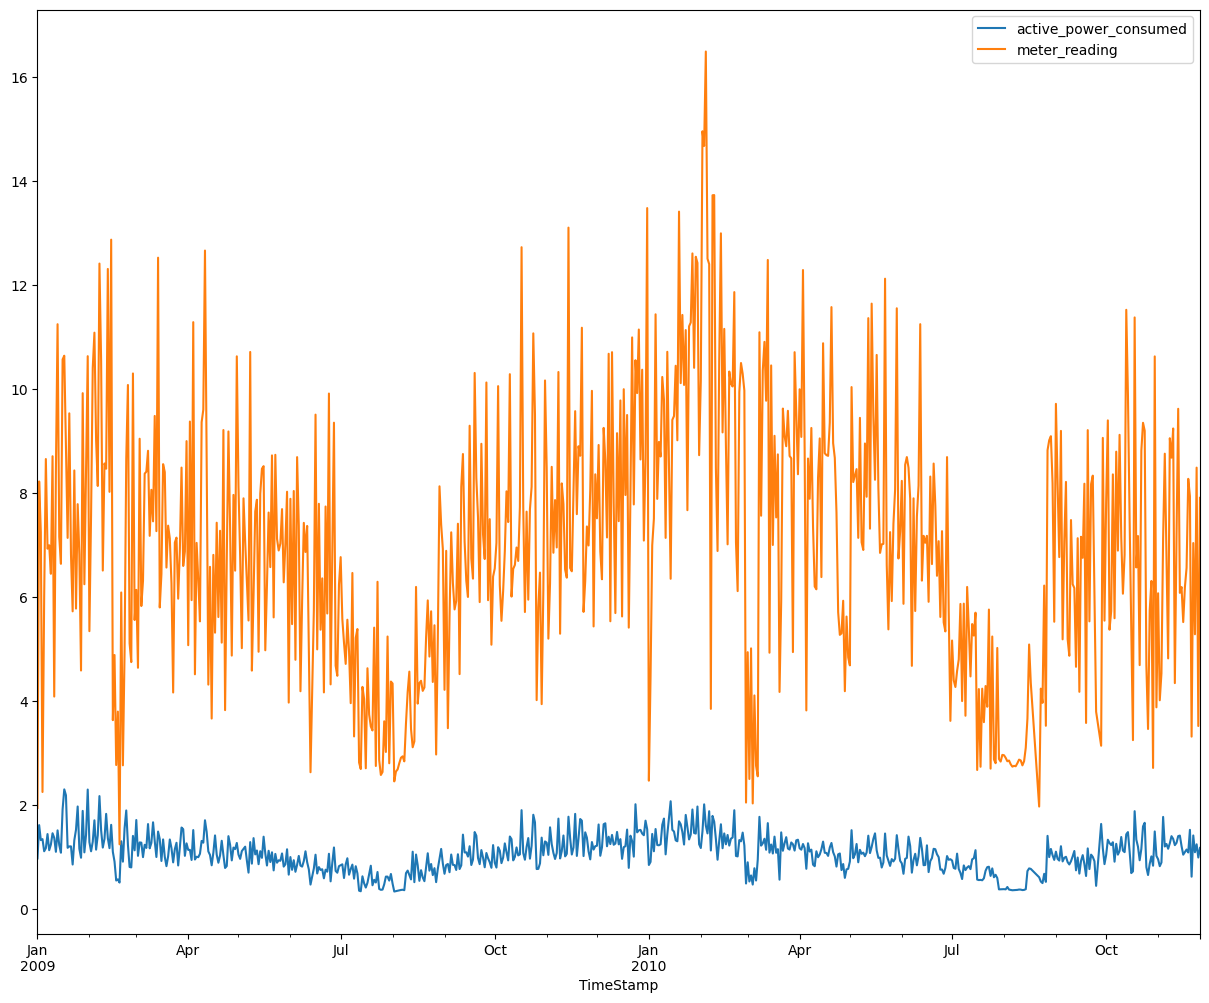

In [36]:
df4.plot(figsize=(15,12))

# 3. Handling Missing Data

In [37]:
df5=pd.read_csv('Shoe+Sales.csv',parse_dates = ['Month'], index_col = 'Month')
df5.head()

,No. of Pairs
Month,
2011-01-01,742
2011-02-01,741
2011-03-01,896
2011-04-01,951
2011-05-01,1030


In [38]:
df5.loc['20120501']

No. of Pairs    932
Name: 2012-05-01 00:00:00, dtype: int64

In [39]:
df5.replace(932, np.NaN, inplace = True)
df5.isna().sum()

No. of Pairs    1
dtype: int64

In [40]:
daily1 = df5.fillna(method='ffill')
daily1['20120401':'20120601']

,No. of Pairs
Month,
2012-04-01,898.0
2012-05-01,898.0
2012-06-01,1055.0


In [41]:
daily2 = df5.fillna(method='bfill')
daily2['20120401':'20120601']

,No. of Pairs
Month,
2012-04-01,898.0
2012-05-01,1055.0
2012-06-01,1055.0


In [42]:
daily3 = df5.interpolate(method = 'linear')
daily3.loc['2012-05-01']

No. of Pairs    976.5
Name: 2012-05-01 00:00:00, dtype: float64

In [43]:
daily4 = df5.fillna(df5.rolling(6,min_periods=1).mean())
daily4.loc['2012-05-01']

No. of Pairs    924.2
Name: 2012-05-01 00:00:00, dtype: float64

# 4. Modifying Time series Range

In [44]:
df1_q = df1.resample('Q').sum()

<Axes: xlabel='Year-Month'>

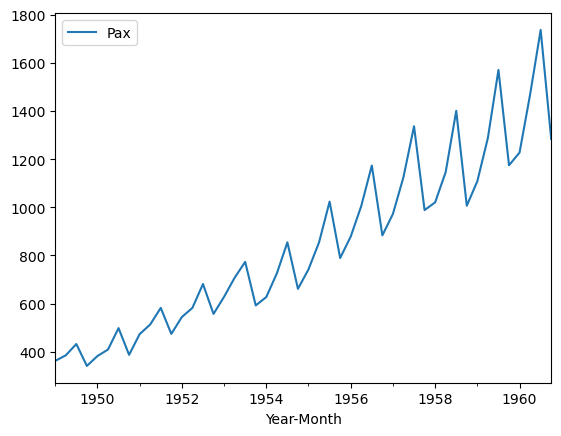

In [45]:
df1_q.plot()

# 5. Decomposition of time series

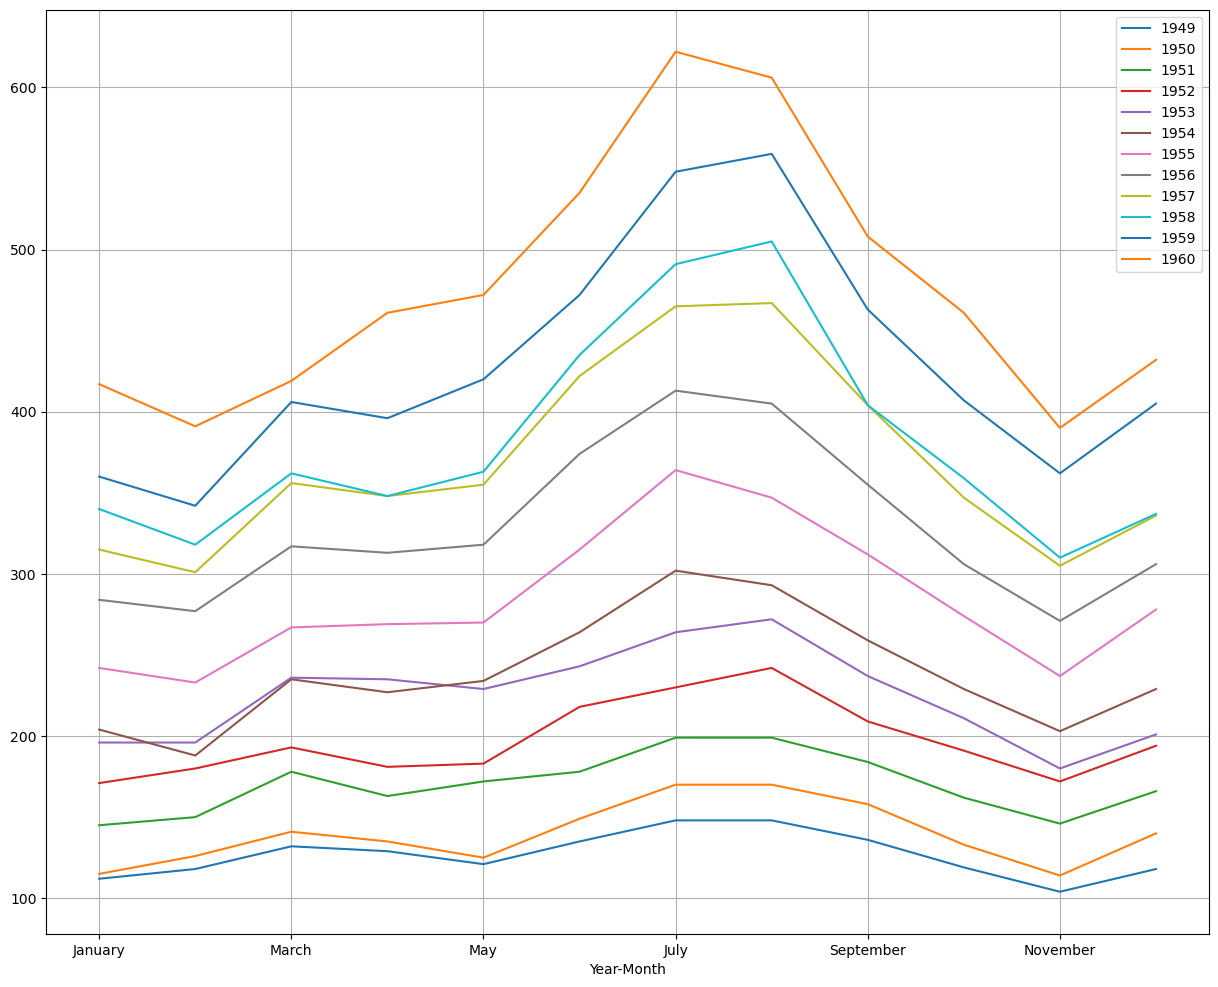

In [46]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
yearly_sales_across_years = pd.pivot_table(df1, values = 'Pax', columns = df1.index.year,index = df1.index.month_name())
yearly_sales_across_years = yearly_sales_across_years.reindex(index = months)
yearly_sales_across_years.plot(figsize=(15,12))
plt.grid()
plt.legend(loc='best');

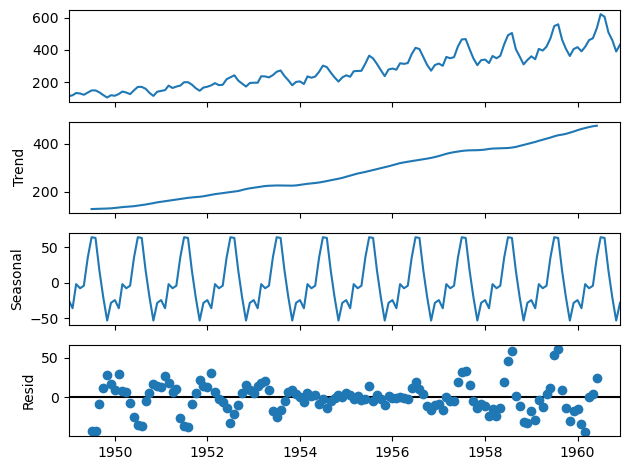

In [47]:
decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

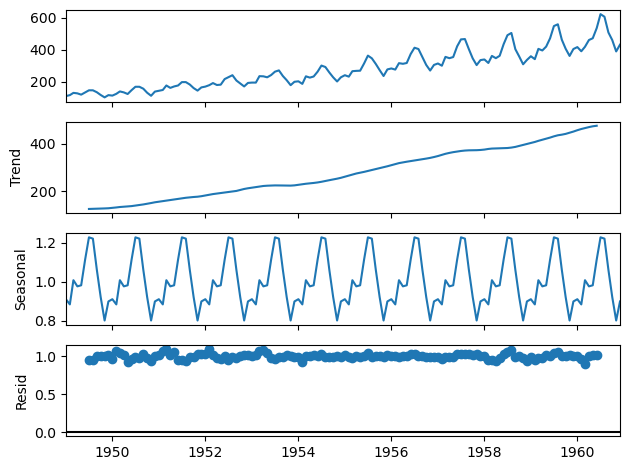

In [48]:
decomposition = seasonal_decompose(df1,model='multiplicative')
decomposition.plot();

In [49]:
decomposition = STL(df1_q).fit()
decomposition.plot();

ValueError: endog must have ndim <= 1

In [50]:
decomposition = STL(np.log10(df1)).fit()
decomposition.plot();

ValueError: endog must have ndim <= 1

# 6. Moving Average

In [51]:
df6 = pd.read_csv('Stock.csv', parse_dates=['TimeStamp'], index_col='TimeStamp',dayfirst=True)
df6.head()

,Close
TimeStamp,
2017-05-01,64.57
2017-05-02,63.78
2017-05-03,62.20
2017-05-04,59.09
2017-05-05,61.67


<Axes: xlabel='TimeStamp'>

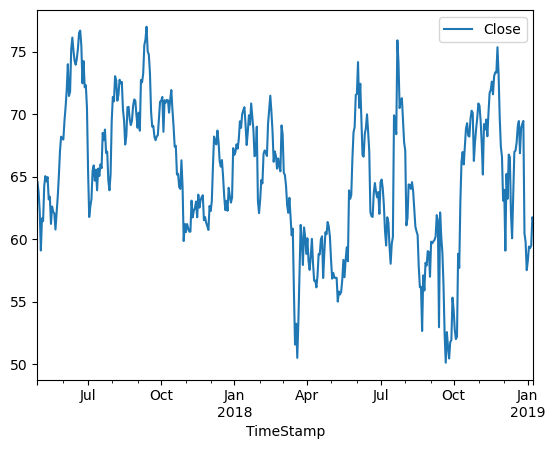

In [52]:
df6.plot()

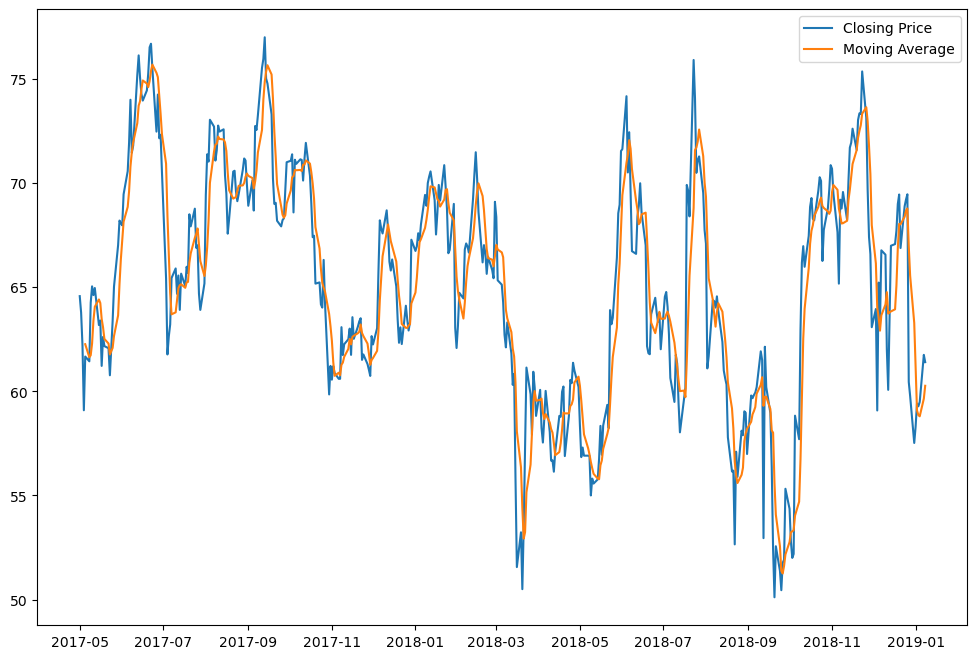

In [53]:
plt.figure(figsize=(12,8))
plt.plot(df6, label='Closing Price')
plt.plot(df6.rolling(5).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()

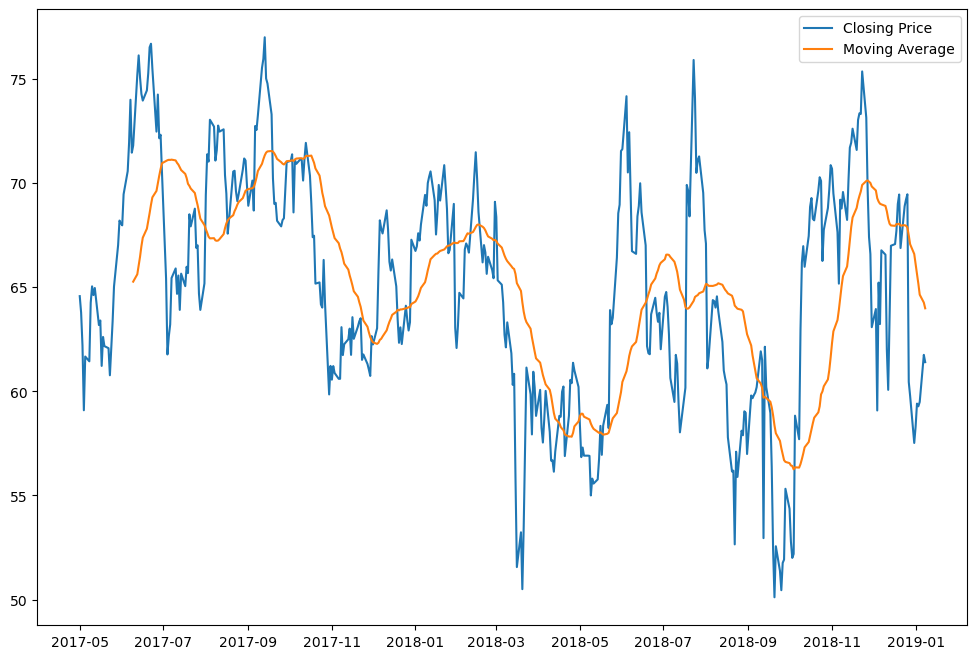

In [54]:
plt.figure(figsize=(12,8))
plt.plot(df6, label='Closing Price')
plt.plot(df6.rolling(30).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()

# 7. Splitting Time Series Data

In [55]:
df7 = pd.read_csv('oil.csv',parse_dates=['date'],index_col='date',dayfirst=True)
df7.head()

,value
date,
2010-01-01,8.2
2010-02-01,8.4
2010-03-01,8.5
2010-04-01,8.7
2010-05-01,8.7


In [56]:
train_end = datetime(2017,1,1)
test_end  = datetime(2017,8,1)

train             = df7[:train_end] 
test              = df7[train_end + timedelta(days=1):test_end]

In [57]:
print(df7.shape)
print(train.shape)
print(test.shape)

(92, 1)
(85, 1)
(7, 1)


In [58]:
from sklearn.model_selection import train_test_split
train1, test1 = train_test_split(df7, test_size=0.07, shuffle=False)
print(train1.shape)
print(test1.shape)

(85, 1)
(7, 1)


# 8. Decomposition Model

### 8.1 Simple Exponential

In [ ]:
#model_ses = ExponentialSmoothing(train,initialization_method='estimated')

In [59]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated',)
model_SES_fit1 = model_SES.fit()
model_SES_fit1.summary()

Dep. Variable:,value,No. Observations:,85
Model:,SimpleExpSmoothing,SSE,2.921
Optimized:,True,AIC,-282.522
Trend:,None,BIC,-277.637
Seasonal:,None,AICC,-282.022
Seasonal Periods:,None,Date:,"Sat, 22 Feb 2025"
Box-Cox:,False,Time:,20:23:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,8.2004085,l.0,True


In [60]:
SES_predict1 = model_SES_fit1.forecast(steps=len(test))

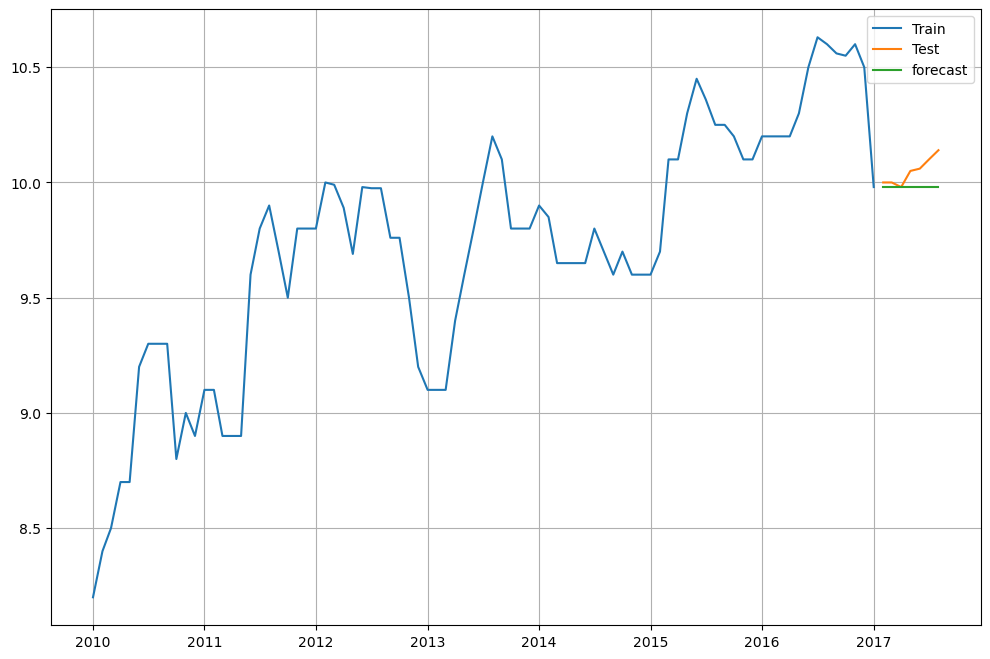

In [61]:
plt.figure(figsize=(12,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict1,label='forecast')

plt.legend(loc='best')
plt.grid()

In [62]:
mean_squared_error(test.values,SES_predict1.values,squared=False)

0.08627198909455157

In [63]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [64]:
MAPE(test.values,SES_predict1.values)

0.665396248381978

### 8.2 Double Exponential

In [65]:
model_DES = Holt(train,exponential=True, initialization_method='estimated')
model_DES_fit1 = model_DES.fit(optimized=True)
model_DES_fit1.summary()

Dep. Variable:,value,No. Observations:,85
Model:,Holt,SSE,2.893
Optimized:,True,AIC,-279.320
Trend:,Multiplicative,BIC,-269.549
Seasonal:,None,AICC,-278.243
Seasonal Periods:,None,Date:,"Sat, 22 Feb 2025"
Box-Cox:,False,Time:,20:24:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,5.6265e-16,beta,True


In [66]:
DES_predict1 = model_DES_fit1.forecast(steps=len(test))

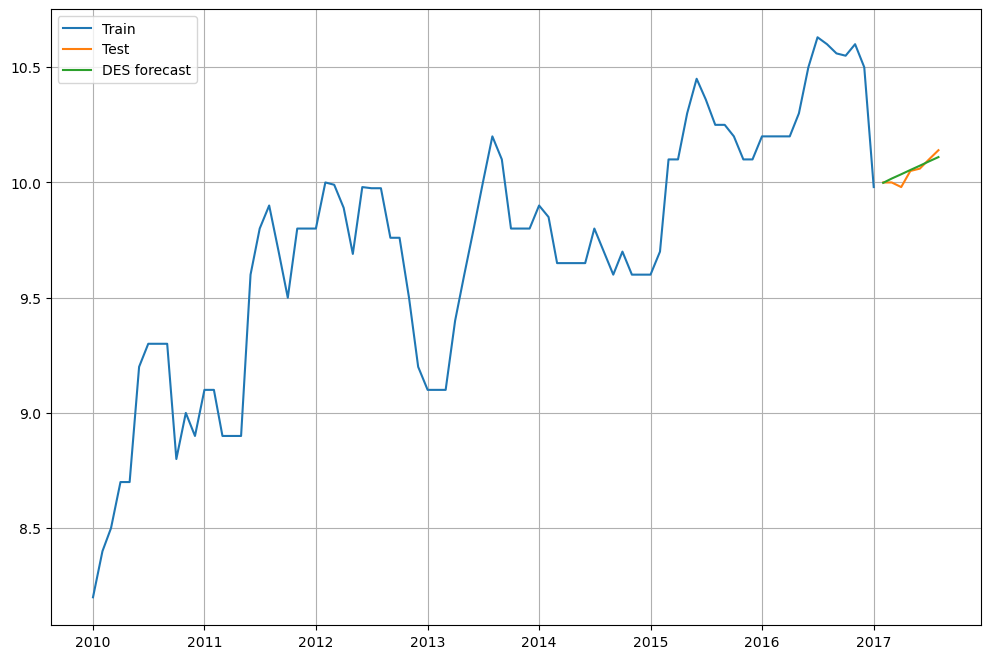

In [67]:
plt.figure(figsize=(12,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict1, label='DES forecast')
plt.legend(loc='best')
plt.grid()

In [68]:
mean_squared_error(test.values,DES_predict1.values,squared=False)

0.02542480103224655

In [69]:
MAPE(test.values,DES_predict1.values)

0.5447541105257979

### 8.3 Tripple Exponential

In [70]:
model_TES_add = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES_add = model_TES_add.fit(optimized=True)
model_TES_add.summary()

Dep. Variable:,value,No. Observations:,85
Model:,ExponentialSmoothing,SSE,1.956
Optimized:,True,AIC,-288.596
Trend:,Additive,BIC,-249.514
Seasonal:,Additive,AICC,-278.233
Seasonal Periods:,12,Date:,"Sat, 22 Feb 2025"
Box-Cox:,False,Time:,20:24:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,4.1252e-16,beta,True


In [71]:
TES_add_predict =  model_TES_add.forecast(len(test))

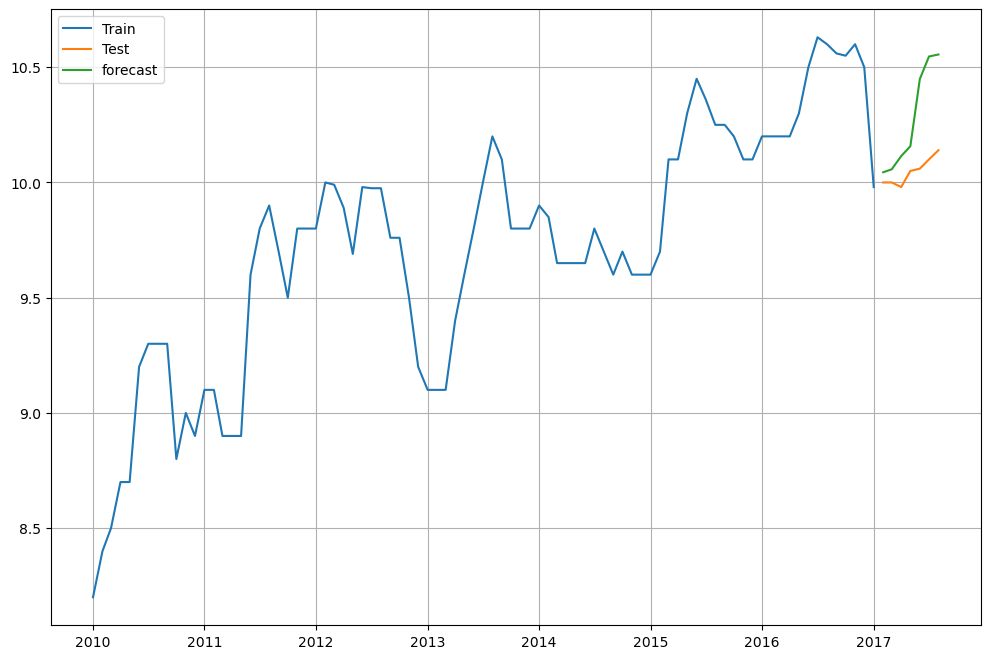

In [72]:
plt.figure(figsize=(12,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_add_predict, label='forecast')
plt.legend(loc='best')
plt.grid()

In [73]:
mean_squared_error(test.values,TES_add_predict.values,squared=False)

0.2823222126796465

In [74]:
MAPE(test.values,TES_add_predict.values)

2.4011237104092644

# 9. Regression Model

In [75]:
observation = df7.values
test_result = adfuller(observation)
test_result

(-2.8246510658045447,
 0.05483790070542707,
 1,
 90,
 {'1%': -3.505190196159122,
  '5%': -2.894232085048011,
  '10%': -2.5842101234567902},
 -62.63227655928708)

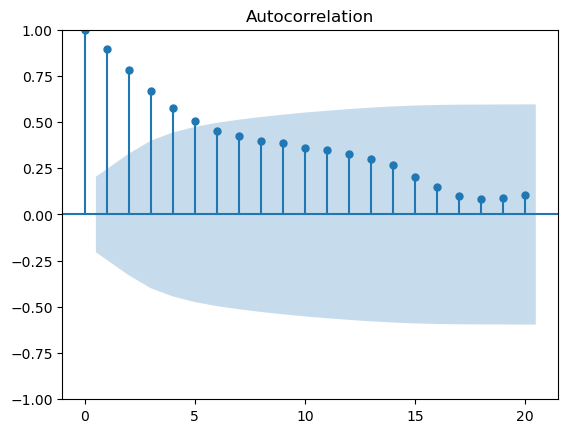

In [76]:
plot_acf(df7);

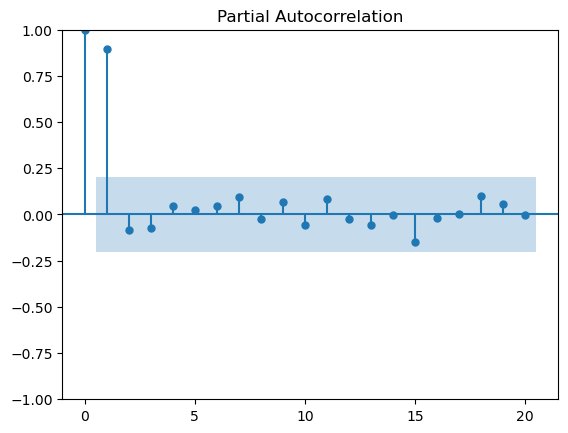

In [77]:
plot_pacf(df7);

### 9.1 ARIMA

In [78]:
model = ARIMA(train)
model_fit = model.fit()

In [79]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   85
Model:                          ARIMA   Log Likelihood                 -68.440
Date:                Sat, 22 Feb 2025   AIC                            140.880
Time:                        20:24:33   BIC                            145.765
Sample:                    01-01-2010   HQIC                           142.845
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7118      0.064    150.999      0.000       9.586       9.838
sigma2         0.2930      0.050      5.803      0.000       0.194       0.392
===================================================================================
Ljung-Box (L1) (Q):                  70.37   Jarque-Bera (JB):                 4.52
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               0.69   Skew:                            -0.56
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
pred_start = test.index[0]
pred_end = test.index[-1]

In [81]:
forecast = model_fit.forecast(10)
forecast

2017-02-01    9.71176
2017-03-01    9.71176
2017-04-01    9.71176
2017-05-01    9.71176
2017-06-01    9.71176
2017-07-01    9.71176
2017-08-01    9.71176
2017-09-01    9.71176
2017-10-01    9.71176
2017-11-01    9.71176
Freq: MS, Name: predicted_mean, dtype: float64

In [82]:
predictions = model_fit.predict(start=pred_start, end=pred_end)
predictions

2017-02-01    9.71176
2017-03-01    9.71176
2017-04-01    9.71176
2017-05-01    9.71176
2017-06-01    9.71176
2017-07-01    9.71176
2017-08-01    9.71176
Freq: MS, Name: predicted_mean, dtype: float64

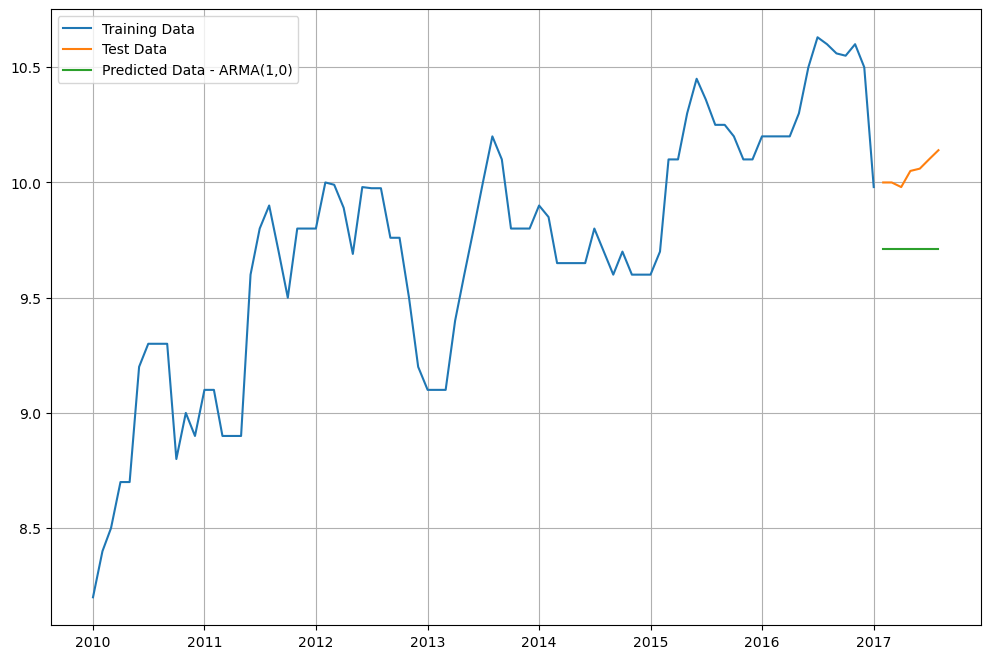

In [83]:
plt.figure(figsize=(12,8))
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predictions,label='Predicted Data - ARMA(1,0)')
plt.legend(loc='best')
plt.grid();

In [84]:
mean_squared_error(test.values,predictions.values,squared=False)

0.33973007040153125

In [85]:
MAPE(test.values,predictions.values)

3.3352899583929

In [86]:
import itertools 
p = q = range(0,4)
d=range(0,2)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [87]:
dfObj1 = pd.DataFrame(columns=['param','AIC'])

In [88]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1.loc[len(dfObj1)+1] = {'param':param, 'AIC': results_Arima.aic}

            except:
                continue

ARIMA(0, 0, 0) - AIC:140.87975153996746
ARIMA(0, 0, 1) - AIC:58.776927881231146
ARIMA(0, 0, 2) - AIC:16.608612191522436
ARIMA(0, 0, 3) - AIC:-11.987103716345889
ARIMA(0, 1, 0) - AIC:-41.77521720686341
ARIMA(0, 1, 1) - AIC:-41.84406958517113
ARIMA(0, 1, 2) - AIC:-41.450463973001696
ARIMA(0, 1, 3) - AIC:-40.795406114818654
ARIMA(1, 0, 0) - AIC:-36.69469682340352
ARIMA(1, 0, 1) - AIC:-37.38139024436899
ARIMA(1, 0, 2) - AIC:-38.29165253167208
ARIMA(1, 0, 3) - AIC:-36.68460005305863
ARIMA(1, 1, 0) - AIC:-42.203672576937244
ARIMA(1, 1, 1) - AIC:-40.296118051193794
ARIMA(1, 1, 2) - AIC:-39.799533876245675
ARIMA(1, 1, 3) - AIC:-40.267411196654486
ARIMA(2, 0, 0) - AIC:-38.13776340855738
ARIMA(2, 0, 1) - AIC:-36.53633226648875
ARIMA(2, 0, 2) - AIC:-36.44647532990561
ARIMA(2, 0, 3) - AIC:-35.46644497821156
ARIMA(2, 1, 0) - AIC:-40.44886094470868
ARIMA(2, 1, 1) - AIC:-38.65999286293557
ARIMA(2, 1, 2) - AIC:-43.158060380417716
ARIMA(2, 1, 3) - AIC:-35.26373230565713
ARIMA(3, 0, 0) - AIC:-36.9557920

In [89]:
dfObj1.shape

(32, 2)

In [90]:
len(dfObj1)

32

In [91]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
23,"(2, 1, 2)",-43.158060
31,"(3, 1, 2)",-42.590142
13,"(1, 1, 0)",-42.203673
6,"(0, 1, 1)",-41.844070
5,"(0, 1, 0)",-41.775217
7,"(0, 1, 2)",-41.450464
8,"(0, 1, 3)",-40.795406
28,"(3, 0, 3)",-40.741405
21,"(2, 1, 0)",-40.448861
14,"(1, 1, 1)",-40.296118


### 9.2 SARIMA

### 9.3 SARIMAX

# 10. Validation

### 10.1 MAE

### 10.2 MAPE

### 10.3 MSE

### 10.4 RMSE